In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv("C:\Data science\Machine learning with phyton\data set\international-airline-passengers.csv",skipfooter=2)

C:\Users\Anuja\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [3]:
df.shape

(144, 2)

In [4]:
df.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df.tail()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   Month                                                                           144 non-null    object
 1   International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [7]:
df["Month"]=pd.to_datetime(df["Month"])

In [8]:
df.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                                                                          Non-Null Count  Dtype         
---  ------                                                                          --------------  -----         
 0   Month                                                                           144 non-null    datetime64[ns]
 1   International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [10]:
df1=df.drop("Month",axis=1)
df1.columns=["volume"]
df1.index=df["Month"]
df1.head()

,volume
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


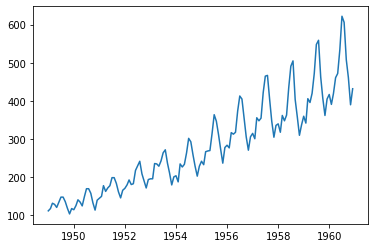

In [11]:
plt.plot(df1)
plt.show()

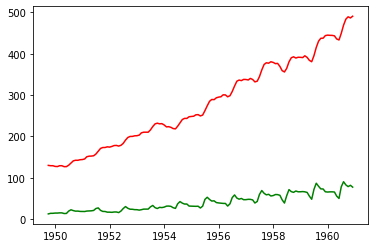

In [12]:
rolling_mean=df1.rolling(10).mean()
rolling_std=df1.rolling(10).std()
#df1.rolling(10)
plt.plot(rolling_mean,c='r')
plt.plot(rolling_std,c='g')
plt.show()

#dicky fuller test

pvalue>0.05 -- null hypothesis data is not stationary pval<0.05 -- data is stationary

In [13]:
from statsmodels.tsa.stattools import adfuller
adfuller(df1["volume"])

(0.815368879206053,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

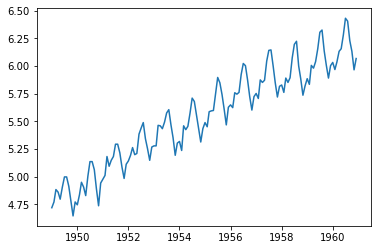

In [16]:
dfl=np.log(df1)
plt.plot(dfl)
plt.show()

In [17]:
dflog=dfl-dfl.shift(1)
dflog.head()

,volume
Month,
1949-01-01,NaN
1949-02-01,0.052186
1949-03-01,0.112117
1949-04-01,-0.022990
1949-05-01,-0.064022


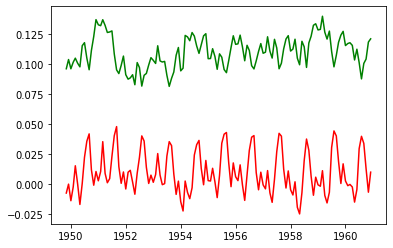

In [18]:
rolling_mean1=dflog.rolling(10).mean()
rolling_std1=dflog.rolling(10).std()
#df1.rolling(10)
plt.plot(rolling_mean1,c='r')
plt.plot(rolling_std1,c='g')
plt.show()

In [19]:
from statsmodels.tsa.stattools import adfuller
adfuller(dflog["volume"].dropna())

(-2.717130598388129,
 0.07112054815085944,
 14,
 128,
 {'1%': -3.4825006939887997,
  '5%': -2.884397984161377,
  '10%': -2.578960197753906},
 -440.35846985568105)

C:\Users\Anuja\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


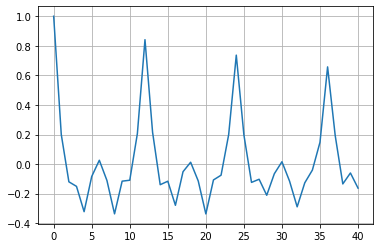

In [20]:
#find p and q value
#p - pacf
#q- acf
from statsmodels.tsa.stattools import acf,pacf
ac=acf(dflog.dropna())
plt.plot(ac)
plt.grid()
plt.show()

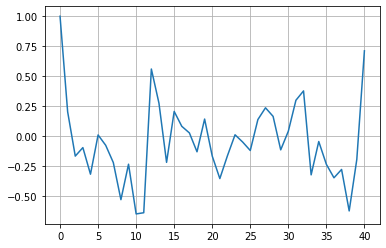

In [21]:
#from statsmodels.tsa.stattools import acf,pacf
pac=pacf(dflog.dropna())
plt.plot(pac)
plt.grid()
plt.show()

In [22]:
#p - 2
#d = 1
#Q - 2
from statsmodels.tsa import arima_model
arima=arima_model.ARIMA(dfl,(2,1,2))
model=arima.fit()

C:\Users\Anuja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Anuja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


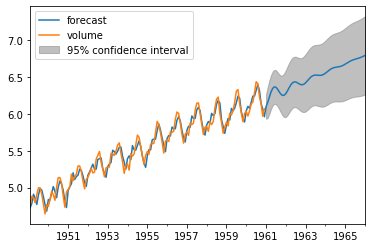

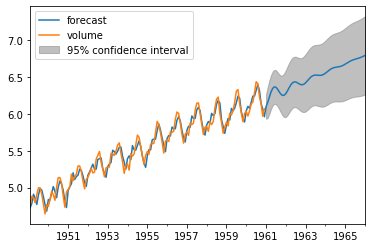

In [23]:
model.plot_predict(start=1,end=204)